In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("data.csv")
data.set_index("Unnamed: 0", inplace=True)
data

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
dmp923122274,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
dmp458034174,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
dmp364043571,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
dmp461339655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
dmp549691332,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dmp910305497,0,0,0,20,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
dmp877506661,0,0,2,0,0,2,0,0,1,0,...,0,0,1,0,3,0,2,0,0,0
dmp356452644,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0


Non integer values in the "Diigo" column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, dmp923122274 to dmp521609268
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Addthis        10000 non-null  int64 
 1   Bebo           10000 non-null  int64 
 2   Blogcatalog    10000 non-null  int64 
 3   Blogger        10000 non-null  int64 
 4   Buddymedia     10000 non-null  int64 
 5   Cnet           10000 non-null  int64 
 6   Conduit        10000 non-null  int64 
 7   Customerlobby  10000 non-null  int64 
 8   Delicious      10000 non-null  int64 
 9   Digg           10000 non-null  int64 
 10  Diigo          10000 non-null  object
 11  Docs           10000 non-null  int64 
 12  Docstoc        10000 non-null  int64 
 13  Download       10000 non-null  int64 
 14  Dropbox        10000 non-null  int64 
 15  Drupal         10000 non-null  int64 
 16  Epinions       10000 non-null  int64 
 17  Evernote       10000 non-null  int64 
 18  Facebook     

Replace the string value by np.NaN values and convert all string numbers to integers (642 NaN values in "Diigo")

In [5]:
print(data["Diigo"].value_counts())
data["Diigo"].replace("Error: value not found", np.NaN, inplace=True)
data["Diigo"] = data["Diigo"].astype('Int64')
print(data["Diigo"].isna().sum())
data["Diigo"].value_counts()

0                         8842
Error: value not found     642
1                          332
2                          183
3                            1
Name: Diigo, dtype: int64
642


0    8842
1     332
2     183
3       1
Name: Diigo, dtype: Int64

In [6]:
print(data.describe())
data["Newsvine"].describe()

           Addthis         Bebo   Blogcatalog       Blogger  Buddymedia  \
count  10000.00000  10000.00000  10000.000000  10000.000000     10000.0   
mean       0.42250      0.78130      0.568100      2.823700         0.0   
std        1.01405      1.48899      1.197709      5.571438         0.0   
min        0.00000      0.00000      0.000000      0.000000         0.0   
25%        0.00000      0.00000      0.000000      0.000000         0.0   
50%        0.00000      0.00000      0.000000      0.000000         0.0   
75%        0.00000      1.00000      0.000000      0.000000         0.0   
max        6.00000      8.00000      7.000000     28.000000         0.0   

               Cnet       Conduit  Customerlobby     Delicious          Digg  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean       1.950400      2.142100       0.000200      0.393100      1.012700   
std        2.937619      3.293993       0.014141      0.811319      2.266021   
min 

count    1.000000e+04
mean     9.637237e+06
std      9.637237e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.637237e+10
Name: Newsvine, dtype: float64

Checking for outliers in every column (between 0 and 1000)

In [7]:
out = []
for i in data.columns[1:-1]:
   if not data[~data[i].between(0, 1000)].empty: # go through dataframe per column and check if value between 0 an 100 (check if resulting df is empty)
        out.append((i, data[i][~data[i].between(0, 1000)])) # if not empy add the dataframe and columnnae as a tuple to the output list

print(out) # column "Newsvine" in row with index "dmp945855405" has a value outside the range

print(data["Newsvine"].describe()) # before
print(data.loc["dmp945855405", "Newsvine"])
data.loc["dmp945855405", "Newsvine"] = np.NaN # replace the outlier value with np.NaN
print(data.loc["dmp945855405", "Newsvine"])
print(data["Newsvine"].describe()) # after

[('Newsvine', Unnamed: 0
dmp945855405    96372367637
Name: Newsvine, dtype: int64)]
count    1.000000e+04
mean     9.637237e+06
std      9.637237e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.637237e+10
Name: Newsvine, dtype: float64
96372367637
nan
count    9999.000000
mean        0.178018
std         0.437894
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Newsvine, dtype: float64


# Process
1. Impute Missing Values
2. Split the data set into train and test (80/20)
3. Feature Scaling (results in better performance with SVM)
4. SVC with rbf / Random Forest -> use grid search to find the right degree

Import sklearn methods

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

Splitting data into features and labels

In [11]:
y = data["Click"]
X = data.drop("Click", axis=1)

1. Imputing missing values in the features (X)
- In columns: "Diigo" and "Newsvine"

In [12]:
print(pd.DataFrame(X, columns=data.columns[:-1]).info()) # before
imp = SimpleImputer(missing_values=np.NaN, strategy='mean') # imputing nan values using the mean
X = imp.fit_transform(X)
print(pd.DataFrame(X, columns=data.columns[:-1]).info()) # after

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, dmp923122274 to dmp521609268
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Addthis        10000 non-null  int64  
 1   Bebo           10000 non-null  int64  
 2   Blogcatalog    10000 non-null  int64  
 3   Blogger        10000 non-null  int64  
 4   Buddymedia     10000 non-null  int64  
 5   Cnet           10000 non-null  int64  
 6   Conduit        10000 non-null  int64  
 7   Customerlobby  10000 non-null  int64  
 8   Delicious      10000 non-null  int64  
 9   Digg           10000 non-null  int64  
 10  Diigo          9358 non-null   Int64  
 11  Docs           10000 non-null  int64  
 12  Docstoc        10000 non-null  int64  
 13  Download       10000 non-null  int64  
 14  Dropbox        10000 non-null  int64  
 15  Drupal         10000 non-null  int64  
 16  Epinions       10000 non-null  int64  
 17  Evernote       10000 non-null  int64 

2. Train / Test Split (80/20)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Feature Scaling -> fit to the traingins data not the test data => apply fitted scaler (from train) to the test
- that way you prevent leaking information about the distribution of the test set into your model

In [12]:
sc = StandardScaler()
# only fit to the trainings data
sc_fitted_train = sc.fit(X_train)
X_train = sc_fitted_train.transform(X_train)
# 2 lines above are the same as: X_train = sc.fit_transform(X_train)
X_test = sc_fitted_train.transform(X_test)
pd.DataFrame(X_train, columns=data.columns[:-1]).describe()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Viadeo,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.0,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,...,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-4.440892e-17,8.970602e-17,1.598721e-17,-6.927792e-17,0.0,8.881784e-19,8.393286e-17,4.440892e-18,-2.842171e-17,-4.973799e-17,...,2.153833e-17,4.884981e-18,6.750156e-17,-3.885781e-17,-1.332268e-16,3.108624e-17,-4.352074e-17,-7.283063e-17,1.110223e-17,6.172840e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.0,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-4.162267e-01,-5.250229e-01,-4.788821e-01,-5.076143e-01,0.0,-6.661500e-01,-6.433003e-01,-1.581337e-02,-4.856077e-01,-4.484004e-01,...,-2.419514e-01,-4.087774e-01,-2.054495e-01,-4.776982e-01,-5.897770e-01,-4.638262e-01,-5.035570e-01,-5.025695e-01,-7.638164e-01,-3.472004e-01
25%,-4.162267e-01,-5.250229e-01,-4.788821e-01,-5.076143e-01,0.0,-6.661500e-01,-6.433003e-01,-1.581337e-02,-4.856077e-01,-4.484004e-01,...,-2.419514e-01,-4.087774e-01,-2.054495e-01,-4.776982e-01,-5.897770e-01,-4.638262e-01,-5.035570e-01,-5.025695e-01,-7.638164e-01,-3.472004e-01
50%,-4.162267e-01,-5.250229e-01,-4.788821e-01,-5.076143e-01,0.0,-6.661500e-01,-6.433003e-01,-1.581337e-02,-4.856077e-01,-4.484004e-01,...,-2.419514e-01,-4.087774e-01,-2.054495e-01,-4.776982e-01,-5.897770e-01,-4.638262e-01,-5.035570e-01,-5.025695e-01,-7.638164e-01,-3.472004e-01
75%,-4.162267e-01,1.473291e-01,-4.788821e-01,-5.076143e-01,0.0,6.923002e-01,5.718352e-01,-1.581337e-02,-4.856077e-01,-4.484004e-01,...,-2.419514e-01,-4.087774e-01,-2.054495e-01,-4.776982e-01,4.880565e-01,-4.638262e-01,-5.035570e-01,-5.025695e-01,7.570359e-01,-3.472004e-01
max,5.506952e+00,4.181441e+00,5.382844e+00,4.543723e+00,0.0,4.428038e+00,4.217242e+00,6.323765e+01,4.447550e+00,5.253231e+00,...,8.185963e+00,6.572477e+00,4.867377e+00,4.419678e+00,4.529932e+00,4.692663e+00,5.403270e+00,4.803344e+00,3.798740e+00,6.485771e+00


# 4.1 Support Vector Machine: Classification

Use Grid Search to find good hyperparameters for SVM (SVC):
- use "rbf" kernel: comparing datapoints to landmarks and compute new features using a similarity funtion
- gamma: each instance's influence is lower -> decision boundary is more irregular (wiggling around indiviudal instances)
- C: determines to what degree margin violations are allowed in the model (high C: more violations allowed)

In [13]:
svc_rbf = SVC(kernel="rbf")

param_grid_svc = {"C": [1, 5, 10, 25, 50, 75, 100],
              "gamma": [0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.0075, 0.01]}

grid = GridSearchCV(svc_rbf, param_grid_svc)

grid.fit(X_train, y_train)
print(grid.best_params_) # best combination of C and gamma is 50 and 0.0005

{'C': 50, 'gamma': 0.0005}


In [14]:
cvres = grid.cv_results_
cvres.keys()
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(round(mean_score, 4), params)
# best score of 0.9719 with parameters C=50 and gamma=0.0005

0.8756 {'C': 1, 'gamma': 0.0001}
0.8934 {'C': 1, 'gamma': 0.0005}
0.9351 {'C': 1, 'gamma': 0.001}
0.9569 {'C': 1, 'gamma': 0.0025}
0.9614 {'C': 1, 'gamma': 0.005}
0.96 {'C': 1, 'gamma': 0.0075}
0.9584 {'C': 1, 'gamma': 0.01}
0.8962 {'C': 5, 'gamma': 0.0001}
0.9629 {'C': 5, 'gamma': 0.0005}
0.9666 {'C': 5, 'gamma': 0.001}
0.9669 {'C': 5, 'gamma': 0.0025}
0.9648 {'C': 5, 'gamma': 0.005}
0.9634 {'C': 5, 'gamma': 0.0075}
0.9628 {'C': 5, 'gamma': 0.01}
0.9405 {'C': 10, 'gamma': 0.0001}
0.968 {'C': 10, 'gamma': 0.0005}
0.9691 {'C': 10, 'gamma': 0.001}
0.9666 {'C': 10, 'gamma': 0.0025}
0.9631 {'C': 10, 'gamma': 0.005}
0.9624 {'C': 10, 'gamma': 0.0075}
0.9628 {'C': 10, 'gamma': 0.01}
0.9624 {'C': 25, 'gamma': 0.0001}
0.97 {'C': 25, 'gamma': 0.0005}
0.9701 {'C': 25, 'gamma': 0.001}
0.9676 {'C': 25, 'gamma': 0.0025}
0.9636 {'C': 25, 'gamma': 0.005}
0.9628 {'C': 25, 'gamma': 0.0075}
0.9628 {'C': 25, 'gamma': 0.01}
0.9689 {'C': 50, 'gamma': 0.0001}
0.9719 {'C': 50, 'gamma': 0.0005}
0.9694 {'C': 50

Applying the svc model to the test data using the fitted parameters

In [15]:
svc_rbf = grid.best_estimator_ # taking the best fitting parameters
y_fit = svc_rbf.predict(X_test)

Classfication Report and Confusion Matrix

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1761
           1       0.91      0.86      0.88       239

    accuracy                           0.97      2000
   macro avg       0.94      0.92      0.93      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix


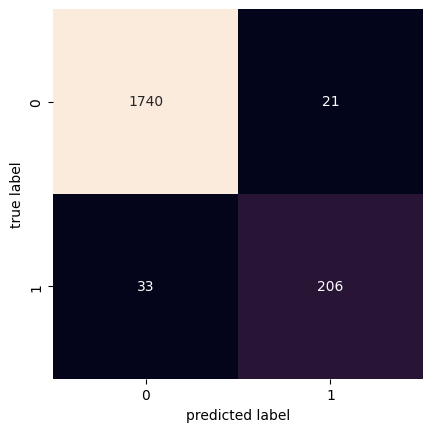

In [16]:
print("Classification Report")
print(classification_report(y_test, y_fit))

print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_fit), square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()

# 4.2 Random Forest: Classification

### Possible parameters:
Decision Tree
- max_depth: Maximum number of levels in tree
- min_samples_split: Minimum number of samples required to split a node
- min_samples_leaf: Minimum number of samples required at each leaf node
- max_leaf_nodes: Maximum number of leaf nodes => must be 2

Bagging Classifier
- n_estimators: Number of trees in random forest
- max_samples: Number of instances each tree is trained on
- bootstrap: Method of selecting samples for training each tree

(cannot set max_samples and bootstrap together)

In [17]:
param_grid_rfc = {'n_estimators': [50, 100, 200, 400, 600, 800, 1000],
                  "bootstrap": [True, False],

                  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]
                  }

In [18]:
rfc = RandomForestClassifier()

rand_grid = RandomizedSearchCV(rfc, param_grid_rfc)

rand_grid.fit(X_train, y_train)
print(rand_grid.best_params_)
# 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 100, 'bootstrap': False

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 80, 'bootstrap': False}


In [19]:
rcvres = rand_grid.cv_results_
rcvres.keys()
for mean_score, params in zip(rcvres["mean_test_score"], rcvres["params"]):
    print(round(mean_score, 4), params)

0.8764 {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': True}
0.8794 {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
0.877 {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}
0.8789 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 70, 'bootstrap': False}
0.8761 {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 50, 'bootstrap': True}
0.88 {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 80, 'bootstrap': False}
0.8779 {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 80, 'bootstrap': False}
0.8764 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}
0.878 {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstra

Applying Random Forest model to the test data using fitted parameters

In [20]:
rfc = rand_grid.best_estimator_ # taking the best fitting parameters
y_pred = rfc.predict(X_test)

Classfication Report and Confusion Matrix

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1761
           1       1.00      0.06      0.11       239

    accuracy                           0.89      2000
   macro avg       0.94      0.53      0.53      2000
weighted avg       0.90      0.89      0.84      2000

Confusion Matrix


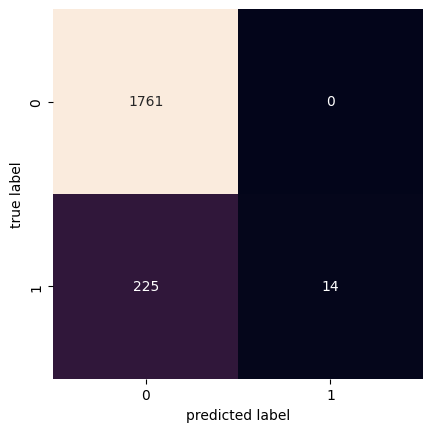

In [21]:
print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()

In [22]:
pd.DataFrame(y_test).value_counts()

Click
0        1761
1         239
dtype: int64

In [23]:
pd.DataFrame(y_pred).value_counts()

0    1986
1      14
dtype: int64

# Question 3.2
Select the 5 most influential features
Before:
- Exclude 5th column "Buddymedia" as it only includes 0s and results in non-valid score later on

In [9]:
y = data["Click"]
X = data.drop(["Click","Buddymedia"], axis=1)
columns = X.columns

1. Imputing missing values in the features (X)
- In columns: "Diigo" and "Newsvine"

In [10]:
print(pd.DataFrame(X, columns=columns).info()) # before
imp = SimpleImputer(missing_values=np.NaN, strategy='mean') # imputing nan values using the mean
X = imp.fit_transform(X)
print(pd.DataFrame(X, columns=columns).info()) # after

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, dmp923122274 to dmp521609268
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Addthis        10000 non-null  int64  
 1   Bebo           10000 non-null  int64  
 2   Blogcatalog    10000 non-null  int64  
 3   Blogger        10000 non-null  int64  
 4   Cnet           10000 non-null  int64  
 5   Conduit        10000 non-null  int64  
 6   Customerlobby  10000 non-null  int64  
 7   Delicious      10000 non-null  int64  
 8   Digg           10000 non-null  int64  
 9   Diigo          9358 non-null   Int64  
 10  Docs           10000 non-null  int64  
 11  Docstoc        10000 non-null  int64  
 12  Download       10000 non-null  int64  
 13  Dropbox        10000 non-null  int64  
 14  Drupal         10000 non-null  int64  
 15  Epinions       10000 non-null  int64  
 16  Evernote       10000 non-null  int64  
 17  Facebook       10000 non-null  int64 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0
1,2.0,0.0,0.0,15.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,13.0,0.0
2,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,2.0,1.0,0.0,25.0,0.0
3,0.0,2.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,9.0,0.0
7997,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,6.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0


In [12]:
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)
print(X_train.shape)
print(X_new.shape)
pd.DataFrame(X_new)

(8000, 80)
(8000, 5)


,0,1,2,3,4
0,7.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,8.0,0.0
2,7.0,0.0,0.0,9.0,1.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
7995,4.0,1.0,0.0,4.0,0.0
7996,5.0,1.0,0.0,7.0,0.0
7997,0.0,0.0,1.0,12.0,0.0
7998,0.0,0.0,0.0,12.0,3.0


Select 5 highest scores
- "get_support" returns a list with False and True values corresponding to the columns which are to be included

In [13]:
print(selector.scores_[selector.get_support()])
print(columns[selector.get_support()])
# same as this: scores = selector.scores_
# print(np.sort(scores)[::-1][:5])

[232.66629528 260.33211849 274.38541874 226.00130489 230.13034409]
Index(['Livejournal', 'Thisnext', 'Typepad', 'Wordpress', 'Yelp'], dtype='object')


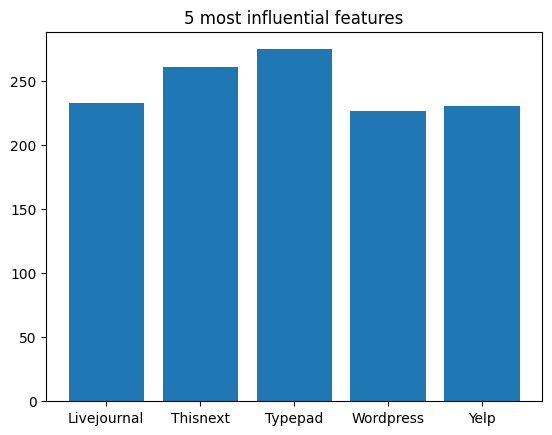

In [14]:
plt.bar(columns[selector.get_support()], selector.scores_[selector.get_support()])
plt.title("5 most influential features")
plt.show()

       feature       score
2      Typepad  274.385419
1     Thisnext  260.332118
0  Livejournal  232.666295
4         Yelp  230.130344
3    Wordpress  226.001305


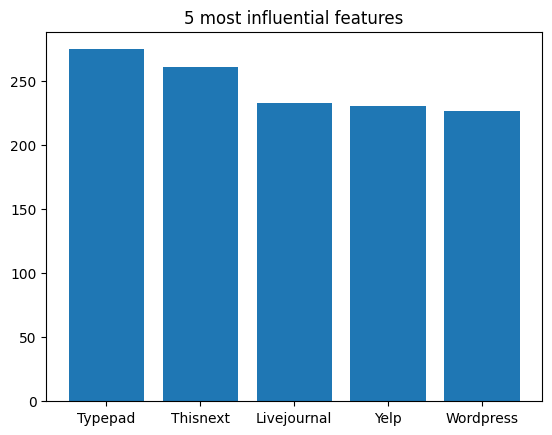

The number of features was reduced from 80 to 5.


In [15]:
def plot_five_features(X, y, col):
    selector = SelectKBest(f_classif, k=5)
    selector.fit_transform(X, y)
    b = pd.DataFrame({"feature": col[selector.get_support()], "score": selector.scores_[selector.get_support()]}).sort_values("score", ascending=False)
    print(b)
    plt.bar(b["feature"], b["score"])
    plt.title("5 most influential features")
    plt.show()
    print(f"The number of features was reduced from {X.shape[-1]} to {X_new.shape[-1]}.")

plot_five_features(X_train, y_train, columns)